# EEEL 4220 Project

In [2]:
import cvxpy as cp
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
#import cartopy.crs as ccrs
#import cartopy.feature as cf
import matplotlib.pyplot as plt
#from geopy.geocoders import Nominatim
import time

In [3]:
# Country to number mapping
countries = {
    "Austria": 0, "Belgium": 1, "Bulgaria": 2, "Croatia": 3, "Czechia": 4, 
    "Denmark": 5, "Estonia": 6, "Finland": 7, "France": 8, "Germany": 9, 
    "Greece": 10, "Hungary": 11, "Ireland": 12, "Italy": 13, "Latvia": 14, 
    "Lithuania": 15, "Luxembourg": 16, "Netherlands": 17, "Poland": 18, "Portugal": 19, 
    "Romania": 20, "Slovakia": 21, "Slovenia": 22, "Spain": 23, "Sweden": 24, 
    "Norway": 25, "Switzerland": 26, "United Kingdom": 27
}

# Line mapping to countries
line_mapping = [
    (countries["Austria"], countries["Czechia"]),
    (countries["Austria"], countries["Germany"]),
    (countries["Austria"], countries["Hungary"]),
    (countries["Austria"], countries["Italy"]),
    (countries["Austria"], countries["Slovenia"]),
    (countries["Belgium"], countries["Germany"]),
    (countries["Belgium"], countries["France"]),
    (countries["Belgium"], countries["Luxembourg"]),
    (countries["Belgium"], countries["Netherlands"]),
    (countries["Bulgaria"], countries["Greece"]),
    (countries["Bulgaria"], countries["Romania"]),
    (countries["Croatia"], countries["Hungary"]),
    (countries["Croatia"], countries["Slovenia"]),
    (countries["Czechia"], countries["Germany"]),
    (countries["Czechia"], countries["Poland"]),
    (countries["Czechia"], countries["Slovakia"]),
    (countries["Denmark"], countries["Germany"]),
    (countries["Denmark"], countries["Sweden"]),
    (countries["Estonia"], countries["Finland"]),
    (countries["Estonia"], countries["Latvia"]),
    (countries["Finland"], countries["Sweden"]),
    (countries["France"], countries["Germany"]),
    (countries["France"], countries["Spain"]),
    (countries["France"], countries["Italy"]),
    (countries["Germany"], countries["Luxembourg"]),
    (countries["Germany"], countries["Netherlands"]),
    (countries["Germany"], countries["Poland"]),
    (countries["Germany"], countries["Sweden"]),
    (countries["Hungary"], countries["Romania"]),
    (countries["Hungary"], countries["Slovenia"]),
    (countries["Hungary"], countries["Slovakia"]),
    (countries["Italy"], countries["Slovenia"]),
    (countries["Latvia"], countries["Lithuania"]),
    (countries["Lithuania"], countries["Poland"]),
    (countries["Lithuania"], countries["Sweden"]),
    (countries["Portugal"], countries["Spain"]),
    (countries["Norway"], countries["Germany"]),
    (countries["Norway"], countries["Denmark"]),
    (countries["Norway"], countries["Finland"]),
    (countries["Norway"], countries["United Kingdom"]),
    (countries["Norway"], countries["Sweden"]),
    (countries["Norway"], countries["Netherlands"]),
    (countries["Switzerland"], countries["Austria"]),
    (countries["Switzerland"], countries["Germany"]),
    (countries["Switzerland"], countries["France"]),
    (countries["Switzerland"], countries["Italy"]),
    (countries["United Kingdom"], countries["Belgium"]),
    (countries["United Kingdom"], countries["France"]),
    (countries["United Kingdom"], countries["Ireland"]),
    (countries["United Kingdom"], countries["Netherlands"])
]

C:\Users\Jiarong Xie\AppData\Local\Temp\ipykernel_57460\928849902.py:38: UserWarning: Legend does not support handles for Annotation instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


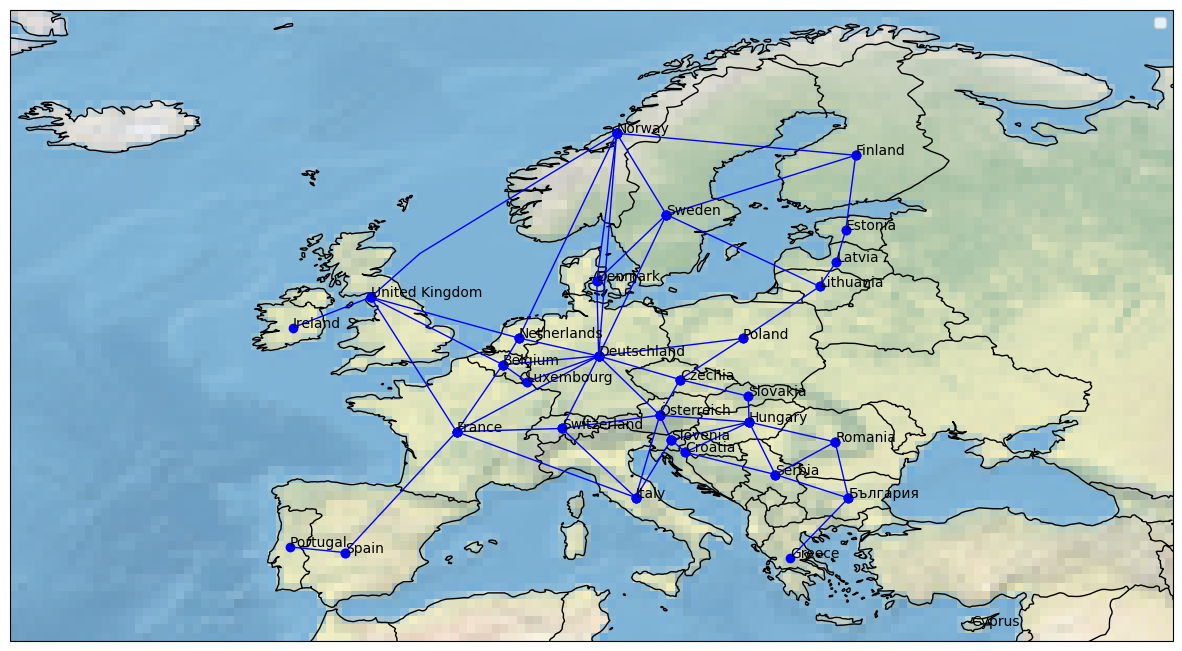

In [57]:
# Reverse mapping from number to country
num_to_country = {v: k for k, v in countries.items()}

# Initialize geolocator
geolocator = Nominatim(user_agent="Google Geocoding API (V3)")


# Function to get coordinates
def get_coordinates(country):
    location = geolocator.geocode(country, viewbox = ((70, -18), (35, 35)))
    return (location.latitude, location.longitude)

# Initialize map
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([-25, 45, 34, 72], crs=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.stock_img()

# Plot lines between countries
for from_num, to_num in line_mapping:
    from_country = num_to_country[from_num]
    to_country = num_to_country[to_num]

    from_coords = get_coordinates(from_country)
    to_coords = get_coordinates(to_country)

    plt.plot([from_coords[1], to_coords[1]], [from_coords[0], to_coords[0]],
             color="blue", linewidth=1, marker='o', transform=ccrs.Geodetic())

for country in list(countries.keys()):
    fromcoords = get_coordinates(country)
    plt.annotate(country, (fromcoords[1], fromcoords[0]), transform=ccrs.Geodetic(), label = fromnum)

    # To prevent overloading the geolocator service
    time.sleep(1)
plt.legend()
# Show the plot
plt.show()